# Evaluate synthetic data
Evaluate synthetic data based on the 'adult' dataset.

## Load libraries and define settings

In [1]:
# general dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# synthesis methods
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.benchmark import Benchmarks

from synthesis.synthesizers.privbayes import PrivBayes
from synthesis.evaluation.metrics import MarginalComparison, AssociationsComparison
from synthesis.evaluation.efficacy import ClassifierComparison, FeatureImportanceComparison

# repo code
from crnsynth import config
from crnsynth.generators import PrivBayesDK
from crnsynth import util
from crnsynth import visual

/Users/dknoors/miniconda3/envs/synth/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# params used
EPSILON = 1
DATASET_NAME = 'adult-minimal'
GENERATOR_NAME = 'privbayes-dk'
FNAME_SUFFIX = None

## Load and process dataset

In [4]:
df_original = pd.read_csv(config.PATH_DATA[DATASET_NAME])
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [5]:
df_synth, generator = util.load_output(dataset_name=DATASET_NAME, generator_name=GENERATOR_NAME, epsilon=EPSILON, fname_suffix=FNAME_SUFFIX)
df_synth.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,54,Self-emp-inc,HS-grad,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
1,27,Private,Assoc-voc,13,Married-spouse-absent,Transport-moving,Other-relative,White,Male,40,United-States,<=50K
2,26,Private,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Male,45,Canada,<=50K
3,50,Private,Bachelors,9,Never-married,Machine-op-inspct,Own-child,White,Female,50,United-States,<=50K
4,37,Private,5th-6th,16,Never-married,Exec-managerial,Not-in-family,White,Female,45,United-States,>50K


## Evaluation

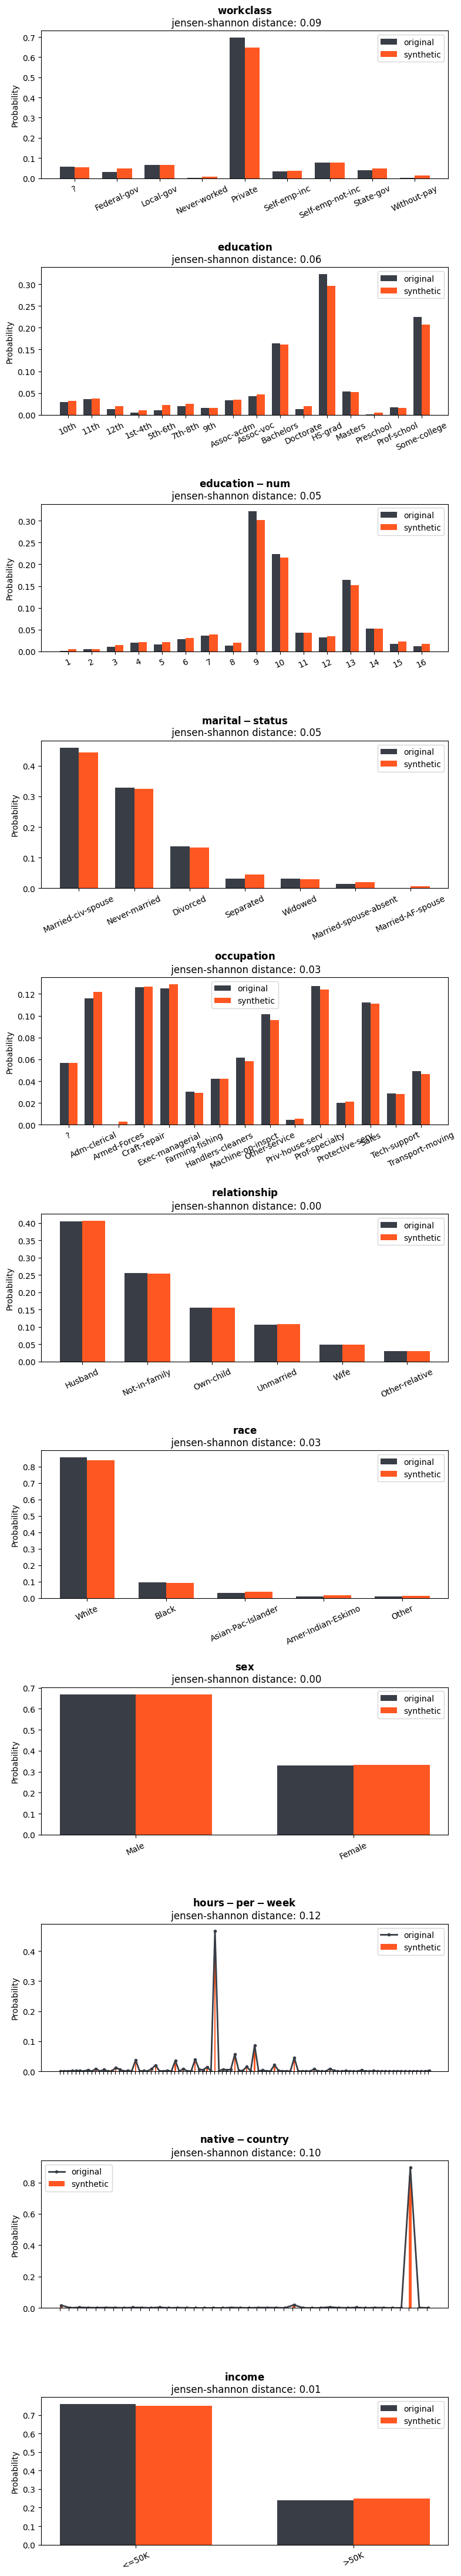

In [15]:
visual.plot_marginal_comparison(df_original, df_synth, exclude_columns=['age'])

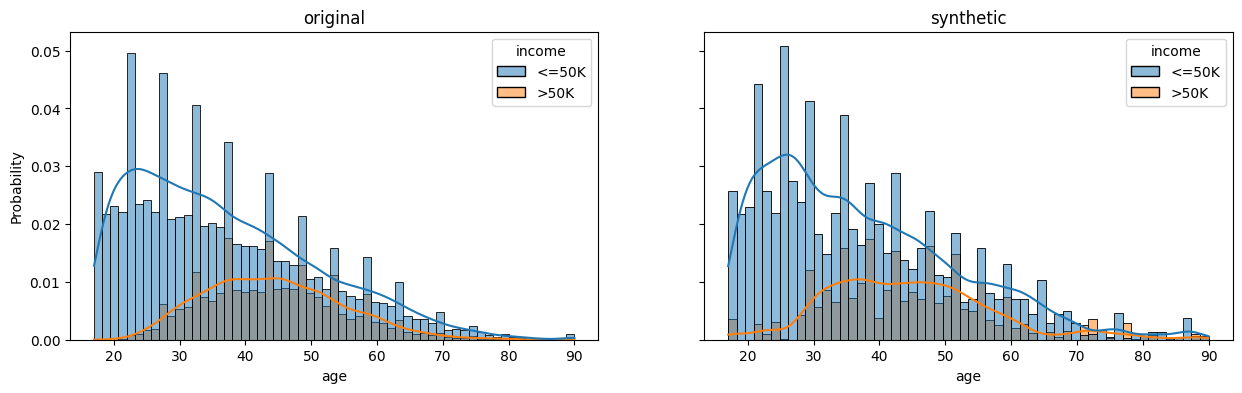

In [29]:
fig, ax = visual.plot_density_comparison(df_original, df_synth, x='age', hue='income')

In [31]:
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


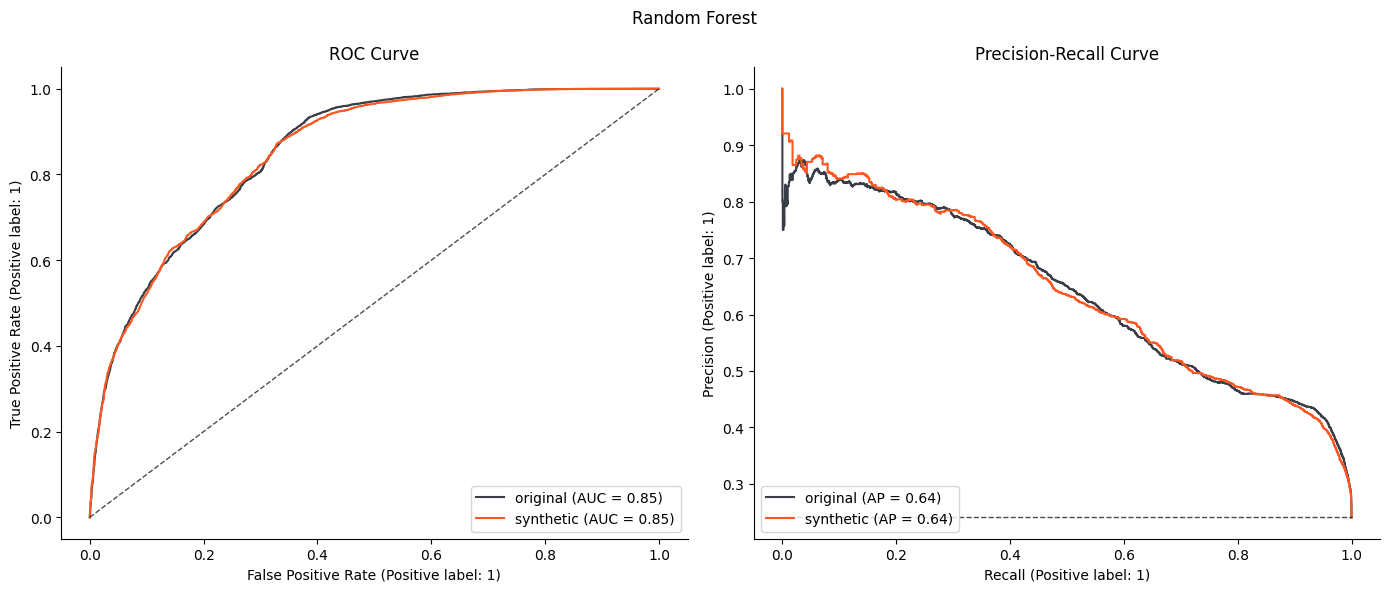

In [7]:
# note we didn't create test set so we use the original data as test.
visual.plot_random_forest_comparison(df_original, df_synth, df_test=df_original, y_column='income')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


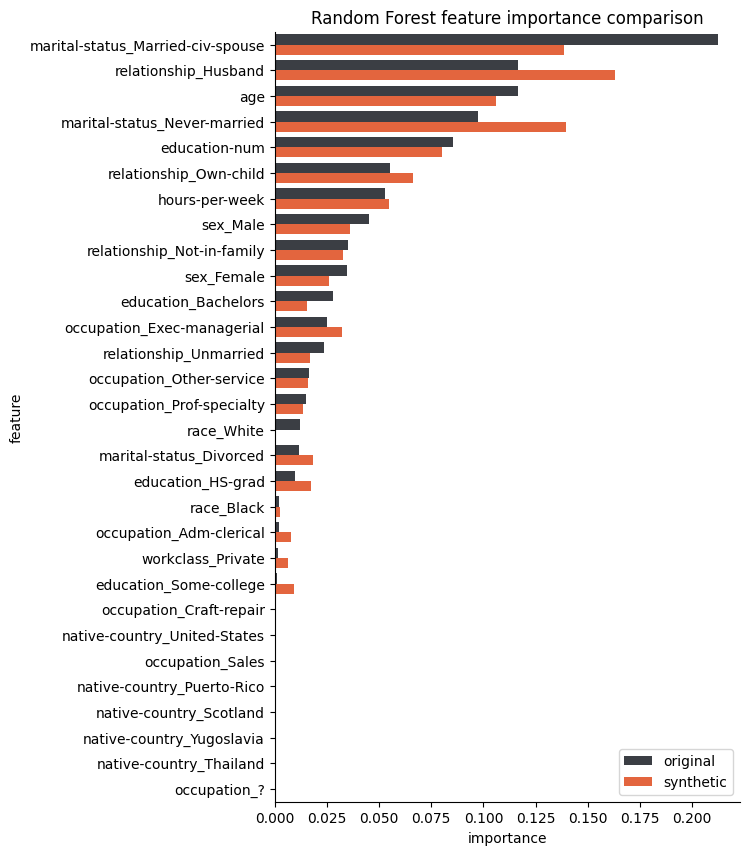

In [8]:
visual.plot_feature_importance_comparison(df_original, df_synth, y_column='income')

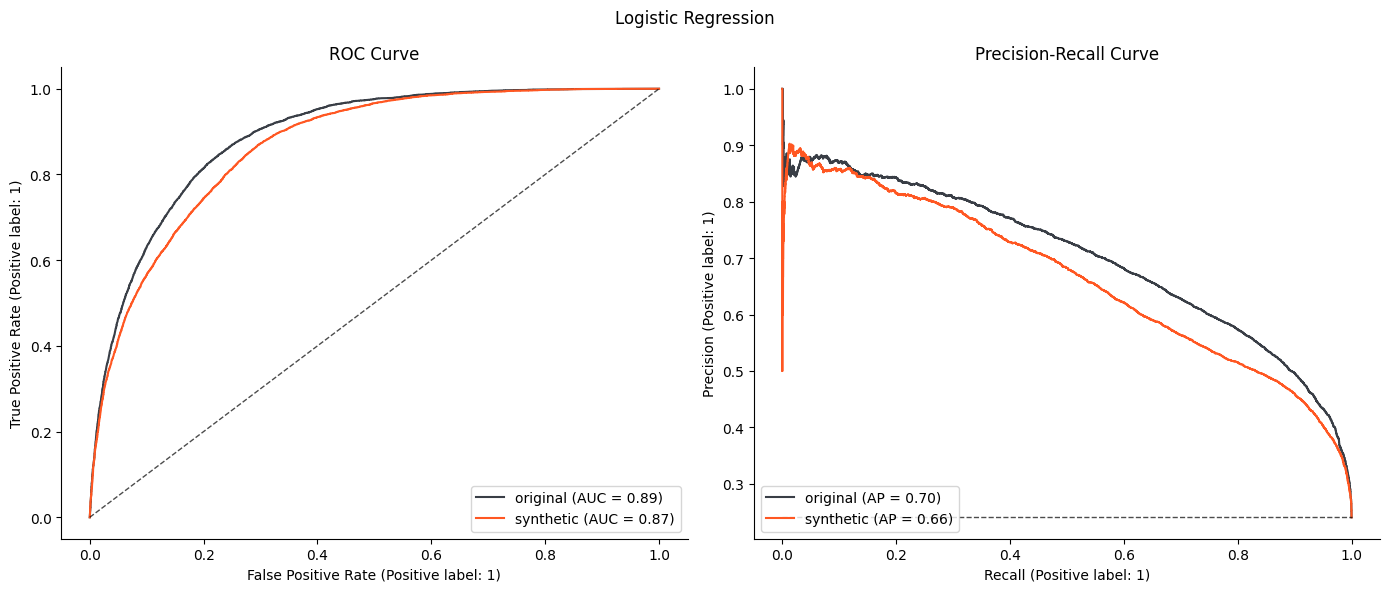

In [9]:
visual.plot_logistic_regression_comparison(df_original, df_synth, df_test=df_original, y_column='income')

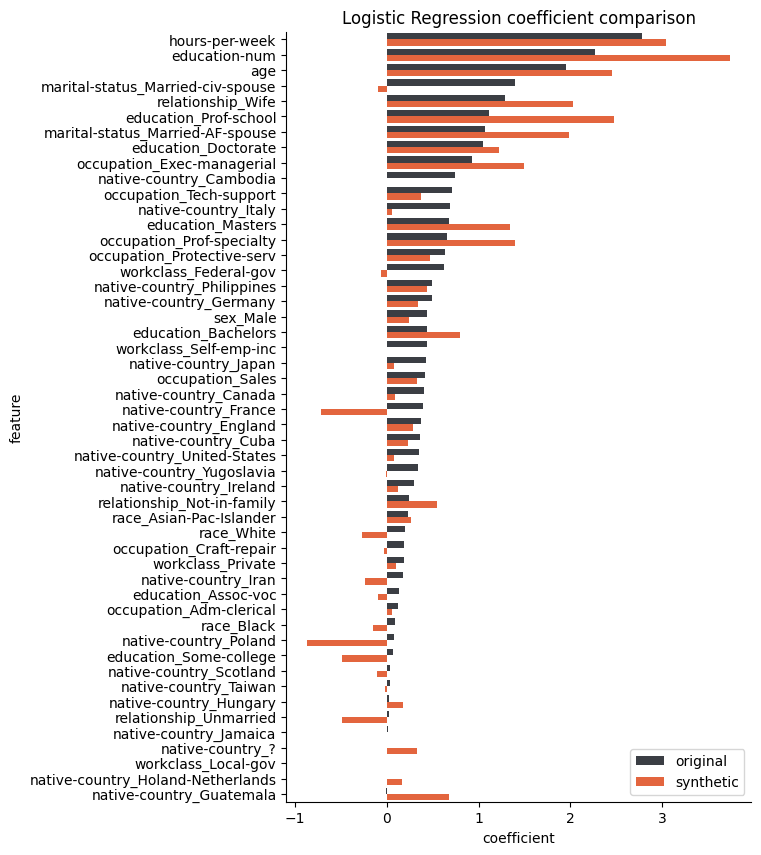

In [11]:
visual.plot_logreg_coef_comparison(df_original, df_synth, y_column='income', top=50)